In [1]:
push!(LOAD_PATH, pwd())
using ResonanceFit, CircleFit, DataGen;

In [2]:
using LinearAlgebra, Plots; pyplot();

In [3]:
const σ = 0.01
const N = 100
const Δθ = 2π / N;

In [4]:
noise() = σ * randn();

In [5]:
function circle_generator(xc::Float64, yc::Float64, r::Float64)
    xs = Vector{Float64}(undef, N)
    ys = Vector{Float64}(undef, N)
    for i = 1:N
        x = xc + r * cos(i * Δθ)
        y = yc + r * sin(i * Δθ)
        u = ([x, y] - [xc, yc]) / norm([x, y] - [xc, yc])
        rvec = (([x, y] - [xc, yc]) + noise() * u) + [xc, yc]
        xs[i] = rvec[1]
        ys[i] = rvec[2]
    end
    xs, ys
end

circle_generator (generic function with 1 method)

In [6]:
function circle(xc::Float64, yc::Float64, r::Float64)
    xs = Vector{Float64}(undef, N)
    ys = Vector{Float64}(undef, N)
    for i = 1:N
        xs[i] = xc + r * cos(i * Δθ)
        ys[i] = yc + r * sin(i * Δθ)
    end
    xs, ys
end;

In [7]:
params = S21Params{Float64}();

In [8]:
fs = params.fᵣ-0.2:0.0001:params.fᵣ+0.2
zs = [S₂₁(f, params) for f in fs];

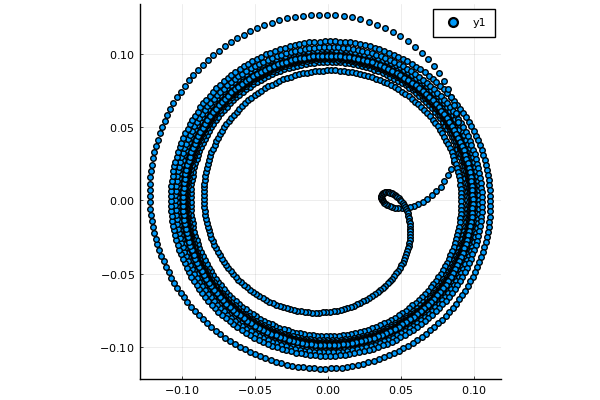

In [9]:
plot(real.(zs), imag.(zs), seriestype=:scatter, aspect_ratio=:equal)

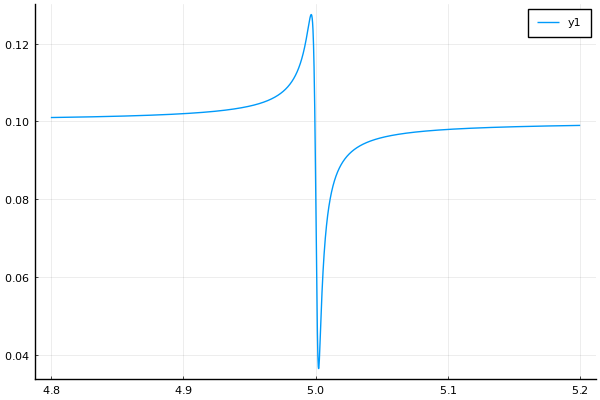

In [10]:
plot(fs, abs.(zs))

In [11]:
normed_zs = [z / (params.a * exp(im * (params.α - 2π * f * params.τ))) for (z, f) in zip(zs, fs)];

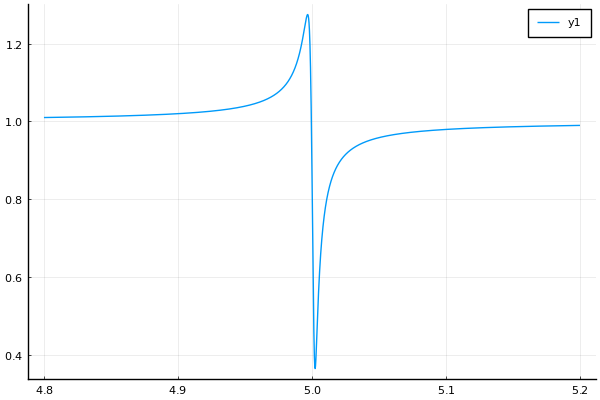

In [12]:
plot(fs, abs.(normed_zs))

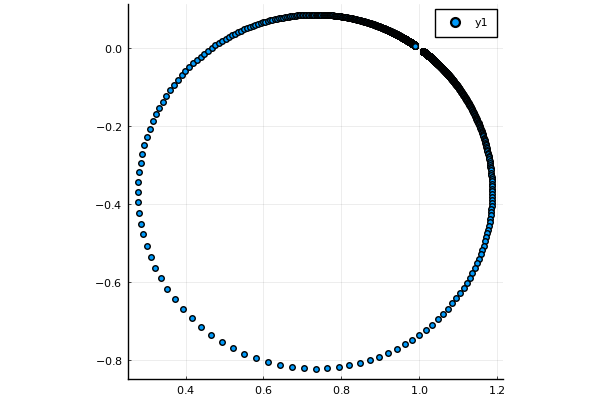

In [13]:
plot(real.(normed_zs), imag.(normed_zs), seriestype=:scatter, aspect_ratio=:equal)

In [14]:
resfit = S21Fit{Float64}(collect(fs), normed_zs)

S21Fit{Float64}(5.6179799149385445, 47.9923856607376, -36.78160996995669, -16.634229941894695 + 8.347135349348342im, 3.8064713519698747, -0.46509035455826003)

In [15]:
resfit.fᵣ

5.6179799149385445

In [16]:
resfit.Ql

-36.78160996995669

In [17]:
fs[argmin(abs.(normed_zs))]

4.9762

In [18]:
θ₀, Ql, fᵣ = resfit.θ₀, resfit.Ql, resfit.fᵣ
phase(f) = θ₀ + 2atan(2 * Ql * (1 - f / fᵣ));

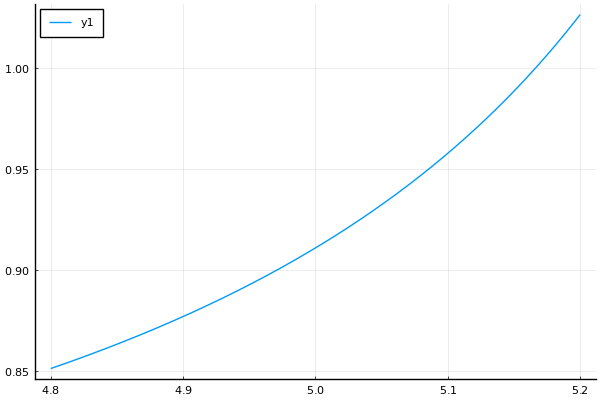

In [19]:
plot(fs, phase.(fs))

In [20]:
fitparams = S21Params{Float64}(ϕ₀=angle(resfit.Qc), fᵣ=resfit.fᵣ, Qc=real(resfit.Qc), Qi=resfit.Qi)

S21Params{Float64}(0.1, 1.2566370614359172, 2.676502299031533, 50.0, 5.6179799149385445, -16.634229941894695, 47.9923856607376)

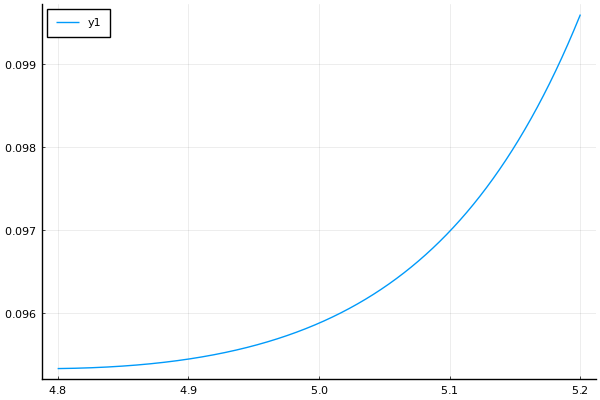

In [21]:
plot(fs, abs.([S₂₁(f, fitparams) for f in fs]))